# Soil Moisture Plots

These are the plot types that people came up with on Dec. 8 that will be discussed on Dec. 17 or Dec. 18.

In [2]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial

import math
import datetime
from datetime import date
import datetime
import time


import scipy
import os, os.path
import itertools
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/Stop_the_Rot/')
import onion_core as oc
import onion_plot_core as opc

In [7]:
data_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/01_files_from_team/Columbia_Basin_Farm_A_red_onion_data/"
python_data_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/Clean_For_Python/"

# Read Soil Moisture data

In [8]:
file_names = ["CLEANED (3) Real Time Soil Moisture data_Field A1.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A2.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A3.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A4.xlsx",
              "CLEANED (3) Real Time Soil Moisture data_Field A5.xlsx"]

In [9]:
A1 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[0], head_count=0)
A2 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[1], head_count=0)
A3 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[2], head_count=0)
A4 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[3], head_count=0)
A5 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[4], head_count=0)

A1["field"] = "A1"
A2["field"] = "A2"
A3["field"] = "A3"
A4["field"] = "A4"
A5["field"] = "A5"

In [10]:
A1.head(10)

,Date,Sensor1,Sensor2,Sensor3,Sensor4,field
0,2017-05-12 08:30:12.999997,0.71,0.43,0.34,0.49,A1
1,2017-05-12 09:00:16.000001,0.71,0.43,0.34,0.49,A1
2,2017-05-12 09:30:13.000000,0.71,0.43,0.34,0.49,A1
3,2017-05-12 10:00:15.999995,0.71,0.43,0.34,0.49,A1
4,2017-05-12 10:30:12.000001,0.71,0.43,0.34,0.49,A1
5,2017-05-12 11:00:15.999998,0.71,0.43,0.34,0.49,A1
6,2017-05-12 11:30:12.999997,0.72,0.43,0.34,0.49,A1
7,2017-05-12 12:00:16.000001,0.72,0.43,0.33,0.49,A1
8,2017-05-12 12:30:13.000000,0.72,0.43,0.33,0.49,A1
9,2017-05-12 13:00:15.999995,0.72,0.43,0.33,0.49,A1


In [11]:
# , sheet_name = 'Real Time Soil Moisture data'
path_n_fileName = data_dir + "soil moisture levels.xlsx"
characteristics_DF = pd.read_excel(io = path_n_fileName, header = 3) 

In [12]:
# holding_capacity.rename(columns={'Field':'field', "Unnamed: 1":"charachteritic", 
#                                  "Sensor 4\"":"Sensor1", "Sensor 8\"":"Sensor2", 
#                                  "Sensor 12\"":"Sensor3", "Sensor 20\"":"Sensor4"})

characteristics_DF.columns = ['field', "characteristic", "Sensor1", "Sensor2", "Sensor3", "Sensor4"]

characteristics_DF.dropna(inplace=True)

In [13]:
characteristics_DF.head(4)

,field,characteristic,Sensor1,Sensor2,Sensor3,Sensor4
0,A1,Fill point,0.55,0.44,0.57,0.55
1,A1,Stress point,0.44,0.34,0.40,0.40
2,A1,Wilt point,0.16,0.08,0.05,0.07
4,A2,Fill point,1.22,1.04,0.90,0.71


In [14]:
def shift_by_Acharacter(a_DF, holding_capacity_DF, character = "Fill point"):
    sensor_names = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']
    fieldName = a_DF["field"].unique()[0]
    
    for column in sensor_names:
        current_shift_value = holding_capacity_DF[(holding_capacity_DF["characteristic"]==character) &
                                                  (holding_capacity_DF["field"] == fieldName )][column]
        current_shift_value = current_shift_value.iloc[0]
        new_colName = column + "_shifted"
        a_DF[new_colName] = a_DF[column] - current_shift_value
        
    return a_DF

In [15]:
A1 = shift_by_Acharacter(a_DF = A1, holding_capacity_DF = characteristics_DF, character = "Fill point")
A2 = shift_by_Acharacter(a_DF = A2, holding_capacity_DF = characteristics_DF, character = "Fill point")
A3 = shift_by_Acharacter(a_DF = A3, holding_capacity_DF = characteristics_DF, character = "Fill point")
A4 = shift_by_Acharacter(a_DF = A4, holding_capacity_DF = characteristics_DF, character = "Fill point")
A5 = shift_by_Acharacter(a_DF = A5, holding_capacity_DF = characteristics_DF, character = "Fill point")

In [16]:
A5.head(2)

,Date,Sensor1,Sensor2,Sensor3,Sensor4,field,Sensor1_shifted,Sensor2_shifted,Sensor3_shifted,Sensor4_shifted
0,2017-05-05 17:56:41.000004,0.57,0.77,0.64,0.55,A5,-0.09,-0.03,-0.11,-0.11
1,2017-05-05 18:30:14.000003,0.57,0.77,0.63,0.55,A5,-0.09,-0.03,-0.12,-0.11


# Compute the boundary violations in July and August

# Plot

In [17]:
plot_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/Plots/Dec17Meeting/"

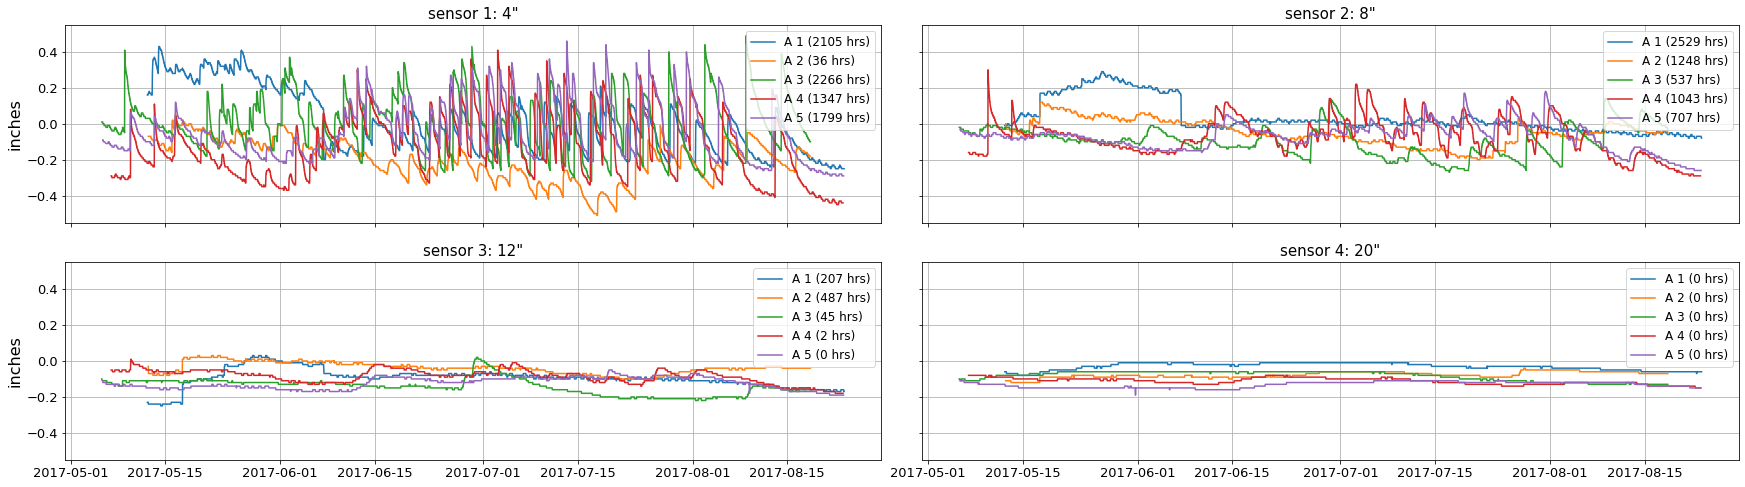

In [23]:
title_font_size = 15
legend_FontSize = 12
x_tick_FontSize = 13
y_tick_FontSize = 13
y_label_FontSize = 16

y_axis_limits = [-0.55, 0.55]

fig, axs = plt.subplots(2, 2, figsize=(30, 8),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.2, 'wspace': .05});

# these are by column
(ax1, ax2), (ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True);

ax1.plot(A1.Date.values, A1.Sensor1_shifted.values, label="A 1 (" + str(len(A1[A1["Sensor1_shifted"] > 0])) + " hrs)")
ax1.plot(A2.Date.values, A2.Sensor1_shifted.values, label="A 2 (" + str(len(A2[A2["Sensor1_shifted"] > 0])) + " hrs)")
ax1.plot(A3.Date.values, A3.Sensor1_shifted.values, label="A 3 (" + str(len(A3[A3["Sensor1_shifted"] > 0])) + " hrs)")
ax1.plot(A4.Date.values, A4.Sensor1_shifted.values, label="A 4 (" + str(len(A4[A4["Sensor1_shifted"] > 0])) + " hrs)")
ax1.plot(A5.Date.values, A5.Sensor1_shifted.values, label="A 5 (" + str(len(A5[A5["Sensor1_shifted"] > 0])) + " hrs)")

ax1.legend(loc="best", fontsize = legend_FontSize);
ax1.set_title("sensor 1: 4\"", fontsize = title_font_size);
ax1.set_ylabel('inches', fontsize = y_label_FontSize)
ax1.tick_params(axis='y', which='major', labelsize = y_tick_FontSize)
ax1.tick_params(axis='x', which='major', labelsize = x_tick_FontSize)

ax1.set_ylim(y_axis_limits)

####################################################################################

ax2.plot(A1.Date.values, A1.Sensor2_shifted.values, label="A 1 (" + str(len(A1[A1["Sensor2_shifted"] > 0])) + " hrs)")
ax2.plot(A2.Date.values, A2.Sensor2_shifted.values, label="A 2 (" + str(len(A2[A2["Sensor2_shifted"] > 0])) + " hrs)")
ax2.plot(A3.Date.values, A3.Sensor2_shifted.values, label="A 3 (" + str(len(A3[A3["Sensor2_shifted"] > 0])) + " hrs)")
ax2.plot(A4.Date.values, A4.Sensor2_shifted.values, label="A 4 (" + str(len(A4[A4["Sensor2_shifted"] > 0])) + " hrs)")
ax2.plot(A5.Date.values, A5.Sensor2_shifted.values, label="A 5 (" + str(len(A5[A5["Sensor2_shifted"] > 0])) + " hrs)")

ax2.legend(loc="best", fontsize = legend_FontSize);
ax2.set_title("sensor 2: 8\"", fontsize = title_font_size);
# ax2.set_ylabel('inches', fontsize = y_label_FontSize)
ax2.tick_params(axis='y', which='major', labelsize = y_tick_FontSize)
ax2.tick_params(axis='x', which='major', labelsize = x_tick_FontSize)

ax2.set_ylim(y_axis_limits)

####################################################################################

ax3.plot(A1.Date.values, A1.Sensor3_shifted.values, label = "A 1 (" + str(len(A1[A1["Sensor3_shifted"] > 0])) + " hrs)")
ax3.plot(A2.Date.values, A2.Sensor3_shifted.values, label = "A 2 (" + str(len(A2[A2["Sensor3_shifted"] > 0])) + " hrs)")
ax3.plot(A3.Date.values, A3.Sensor3_shifted.values, label = "A 3 (" + str(len(A3[A3["Sensor3_shifted"] > 0])) + " hrs)")
ax3.plot(A4.Date.values, A4.Sensor3_shifted.values, label = "A 4 (" + str(len(A4[A4["Sensor3_shifted"] > 0])) + " hrs)")
ax3.plot(A5.Date.values, A5.Sensor3_shifted.values, label = "A 5 (" + str(len(A5[A5["Sensor3_shifted"] > 0])) + " hrs)")

ax3.legend(loc="best", fontsize = legend_FontSize);
ax3.set_title("sensor 3: 12\"", fontsize = title_font_size);
ax3.set_ylabel('inches', fontsize = y_label_FontSize)
ax3.tick_params(axis='y', which='major', labelsize = y_tick_FontSize)
ax3.tick_params(axis='x', which='major', labelsize = x_tick_FontSize)

ax3.set_ylim(y_axis_limits)

####################################################################################

ax4.plot(A1.Date.values, A1.Sensor4_shifted.values, label="A 1 (" + str(len(A1[A1["Sensor4_shifted"] > 0])) + " hrs)")
ax4.plot(A2.Date.values, A2.Sensor4_shifted.values, label="A 2 (" + str(len(A2[A2["Sensor4_shifted"] > 0])) + " hrs)")
ax4.plot(A3.Date.values, A3.Sensor4_shifted.values, label="A 3 (" + str(len(A3[A3["Sensor4_shifted"] > 0])) + " hrs)")
ax4.plot(A4.Date.values, A4.Sensor4_shifted.values, label="A 4 (" + str(len(A4[A4["Sensor4_shifted"] > 0])) + " hrs)")
ax4.plot(A5.Date.values, A5.Sensor4_shifted.values, label="A 5 (" + str(len(A5[A5["Sensor4_shifted"] > 0])) + " hrs)")

ax4.legend(loc="best", fontsize = legend_FontSize);
ax4.set_title("sensor 4: 20\"", fontsize = title_font_size);
# ax4.set_ylabel('inches', fontsize = y_label_FontSize)
ax4.tick_params(axis='y', which='major', labelsize = y_tick_FontSize)
ax4.tick_params(axis='x', which='major', labelsize = x_tick_FontSize)

ax4.set_ylim(y_axis_limits)

####################################################################################

file_name = plot_dir + "23_sensors_relative_to_fillPoint.png"
plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
plt.show()

In [20]:
A5.Date.values[0]

numpy.datetime64('2017-05-05T17:56:41.000004000')

In [22]:
plot_dir

'/Users/hn/Documents/01_research_data/Stop_the_Rot/Plots/Dec17Meeting/'